# Finding 1 using Pandas - Joe

# Genres that yield highest net profit

## import the data

In [109]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [110]:
#changing the display settings in dataframes to only format floats and display columns

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 100)

In [112]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData\\bom.movie_gross.csv.gz',
 './zippedData\\imdb.name.basics.csv.gz',
 './zippedData\\imdb.title.akas.csv.gz',
 './zippedData\\imdb.title.basics.csv.gz',
 './zippedData\\imdb.title.crew.csv.gz',
 './zippedData\\imdb.title.principals.csv.gz',
 './zippedData\\rt.movie_info.csv.gz',
 './zippedData\\rt.reviews.csv.gz',
 './zippedData\\tmdb.movies.csv.gz',
 './zippedData\\tn.movie_budgets.csv.gz']

In [113]:
datafiles_dict = {}
for filename in datafiles:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename)
    datafiles_dict[filename_cleaned] = filename_df

In [114]:
print(datafiles_dict.keys())

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'rt_movie_info', 'rt_reviews', 'tmdb_movies', 'tn_movie_budgets'])


In [115]:
#load in dataset in csv to dataframe

tmdb_mglb_df = pd.read_csv('tmdb_mglb.csv')

tmdb_mglb_df.head() #call first 5 rows

,Unnamed: 0,id,original_title,popularity,release_date_x,title,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,NaN,nan,nan,nan,nan,nan
1,1,10191,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",How to Train Your Dragon,165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,2,10138,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",Iron Man 2,170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,3,862,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",Toy Story,30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,4,27205,Inception,27.92,2010-07-16,Inception,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",Inception,160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


In [116]:
type(tmdb_mglb_df) #call type of variable

pandas.core.frame.DataFrame

In [117]:
tmdb_mglb_df.shape #return the dimensions of the dataframe array

(26597, 35)

In [118]:
tmdb_mglb_df.info() #return basic summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26597 entries, 0 to 26596
Data columns (total 35 columns):
Unnamed: 0                    26597 non-null int64
id                            26597 non-null int64
original_title                26597 non-null object
popularity                    26597 non-null float64
release_date_x                26597 non-null object
title                         26597 non-null object
vote_average                  26597 non-null float64
vote_count                    26597 non-null int64
Fantasy                       26597 non-null float64
Drama                         26597 non-null float64
War                           26597 non-null float64
Mystery                       26597 non-null float64
Comedy                        26597 non-null float64
Romance                       26597 non-null float64
Family                        26597 non-null float64
Music                         26597 non-null float64
Documentary                   26597 non-null float64

In [119]:
tmdb_mglb_df_clean = tmdb_mglb_df.drop(['Unnamed: 0', 'movie', 'title'], axis=1) #drop columns

In [120]:
tmdb_mglb_df_clean.head() #call first 5 rows

,id,original_title,popularity,release_date_x,vote_average,vote_count,Fantasy,Drama,War,Mystery,Comedy,Romance,Family,Music,Documentary,Animation,Western,Action,Crime,Thriller,TV Movie,Adventure,History,Science Fiction,Horror,original_language,release_date_y,production_budget,domestic_gross,worldwide_gross,domesticgross_v_production,total_net
0,12444,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,7.70,10788,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,NaN,nan,nan,nan,nan,nan
1,10191,How to Train Your Dragon,28.73,2010-03-26,7.70,7610,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,English,"Mar 26, 2010",165000000.00,217581232.00,494870992.00,52581232.00,329870992.00
2,10138,Iron Man 2,28.52,2010-05-07,6.80,12368,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"May 7, 2010",170000000.00,312433331.00,621156389.00,142433331.00,451156389.00
3,862,Toy Story,28.00,1995-11-22,7.90,10174,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,English,"Nov 22, 1995",30000000.00,191796233.00,364545516.00,161796233.00,334545516.00
4,27205,Inception,27.92,2010-07-16,8.30,22186,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,English,"Jul 16, 2010",160000000.00,292576195.00,835524642.00,132576195.00,675524642.00


## Overall, what are the top 5 grossing films?

In [121]:
#sort values by worldwide_gross, descending

sortbytotalgross = tmdb_mglb_df_clean.sort_values(by=['worldwide_gross'], ascending=False)

In [122]:
#call gross sorted dataframe by columns

sortbytotalgross.loc[:, ['original_title', 'worldwide_gross']]

,original_title,worldwide_gross
6,Avatar,2776345279.00
23887,Avengers: Infinity War,2048134200.00
14236,Jurassic World,1648854864.00
14239,Furious 7,1518722794.00
5196,The Avengers,1517935897.00
...,...,...
26592,Laboratory Conditions,nan
26593,_EXHIBIT_84xxx_,nan
26594,The Last One,nan
26595,Trailer Made,nan


***Findings***: Looking at the total gross revenue of worldwide, including domestic sales, the top 5 grossing films are <br> 
<ul><li>1) Avatar - &#36; 2,776,345,279 </li>
    <li>2) Avengers: Infinity War - &#36; 2,048,134,200.00</li>
    <li>3) Jurassic World - &#36; 1,648,854,864</li>
    <li>4) Furious 7 - &#36; 1,518,722,794</li> 
    <li>5) The Avengers - &#36; 1,518,722,794</li></ul>

In [165]:
sortbytotalgross2 = sortbytotalgross.reset_index(drop=True)

top5gross = sortbytotalgross2.loc[:4, ['original_title', 'worldwide_gross']]

top5gross

,original_title,worldwide_gross
0,Avatar,2776345279.00
1,Avengers: Infinity War,2048134200.00
2,Jurassic World,1648854864.00
3,Furious 7,1518722794.00
4,The Avengers,1517935897.00


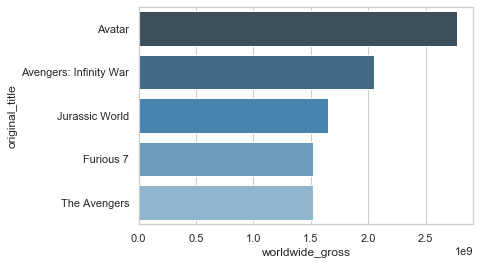

In [175]:
#visual of top 5 grossing

fig, ax =plt.subplots()
ax = sns.barplot(x='worldwide_gross', y='original_title', data=top5gross, palette="Blues_d")

### If available, what are the genres of those top 5 grossing films? 

code here: KAT

***Findings***: Leveraged the [imdb_title_basics] dataset to find the titles from top 5 grossing films and noted identified genres for each film

## Top 5 grossing films by year

### What are the titles of the films?

KAT

### What was the production cost?

KAT

***Findings***: write summary here

### What was the runtime?

In [ ]:
code here: KAT

***Findings***: write summary here >> Leveraged the [imdb_title_basics] dataset to find the titles from top 5 grossing films and noted the runtime for each film

## Most recently, what has been the average production cost? 

In [127]:
#set new dataframe looking at movies, release dates, and production costs

recentavgpcost = tmdb_mglb_df.loc[:, ['original_title', 'release_date_x', 'production_budget']]

recentavgpcost

,original_title,release_date_x,production_budget
0,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,nan
1,How to Train Your Dragon,2010-03-26,165000000.00
2,Iron Man 2,2010-05-07,170000000.00
3,Toy Story,1995-11-22,30000000.00
4,Inception,2010-07-16,160000000.00
...,...,...,...
26592,Laboratory Conditions,2018-10-13,nan
26593,_EXHIBIT_84xxx_,2018-05-01,nan
26594,The Last One,2018-10-01,nan
26595,Trailer Made,2018-06-22,nan


In [128]:
#sort by production budget and reset index

recentavgpcost = recentavgpcost.sort_values(by=['release_date_x'], ascending=False)

recentavgpcost

,original_title,release_date_x,production_budget
26137,Murdery Christmas,2020-12-25,nan
24972,This Changes Everything,2019-06-28,nan
24345,Ophelia,2019-06-28,nan
24377,All Creatures Here Below,2019-05-17,nan
24083,We Have Always Lived in the Castle,2019-05-17,nan
...,...,...,...
11229,The Best Years of Our Lives,1946-12-25,2100000.00
26425,How Walt Disney Cartoons Are Made,1939-01-19,nan
3596,Le Bonheur,1936-02-27,nan
21831,The Vampire Bat,1933-01-21,nan


In [129]:
#drop rows with missing production costs

recentavgpcost = recentavgpcost.dropna(subset=['production_budget'])

recentavgpcost

,original_title,release_date_x,production_budget
24771,El Chicano,2019-05-03,8000000.00
24678,Braid,2019-02-01,1660000.00
20700,The Upside,2019-01-11,37500000.00
24001,Destroyer,2018-12-25,9000000.00
23990,Holmes & Watson,2018-12-25,42000000.00
...,...,...,...
159,Carrie,1976-11-03,30000000.00
160,Carrie,1976-11-03,1800000.00
24379,Viskningar och rop,1972-12-21,400000.00
23950,2001: A Space Odyssey,1968-04-10,10500000.00


In [130]:
#reset index of sorted dataframe to release date

recentavgpcost = recentavgpcost.reset_index(drop=True)

recentavgpcost

,original_title,release_date_x,production_budget
0,El Chicano,2019-05-03,8000000.00
1,Braid,2019-02-01,1660000.00
2,The Upside,2019-01-11,37500000.00
3,Destroyer,2018-12-25,9000000.00
4,Holmes & Watson,2018-12-25,42000000.00
...,...,...,...
2311,Carrie,1976-11-03,30000000.00
2312,Carrie,1976-11-03,1800000.00
2313,Viskningar och rop,1972-12-21,400000.00
2314,2001: A Space Odyssey,1968-04-10,10500000.00


In [142]:
recentavgpcost.loc[:999, 'release_date_x']

0      2019-05-03
1      2019-02-01
2      2019-01-11
3      2018-12-25
4      2018-12-25
          ...    
995    2014-11-28
996    2014-11-26
997    2014-11-26
998    2014-11-26
999    2014-11-24
Name: release_date_x, Length: 1000, dtype: object

In [143]:
#set new variable for 1000 most recently released movies

recentpcost = recentavgpcost.loc[:999, 'production_budget']

recentpcost

0       8000000.00
1       1660000.00
2      37500000.00
3       9000000.00
4      42000000.00
          ...     
995     2000000.00
996    40000000.00
997    15000000.00
998   132000000.00
999     5900000.00
Name: production_budget, Length: 1000, dtype: float64

In [148]:
#call summary statistics of dataframe

recentpcost.describe()

count        1000.00
mean     40336695.37
std      53046090.40
min         25000.00
25%       6000000.00
50%      20000000.00
75%      50000000.00
max     330600000.00
Name: production_budget, dtype: float64

In [151]:
#calculate median of dataframe

recentpcost.median()

20000000.0

In [152]:
#calculate mode of dataframe

recentpcost.mode()

0   10000000.00
dtype: float64

***Findings***: Average recent production costs since Nov 2014: <br>
<ul><li> Mean - &#36; 40,336,695.37 </li>
    <li> Median - &#36; 20,000,000 </li>
    <li> Mode - &#36; 10,000,000 </li></ul>
The production cost of a movie averaged &#36; 20,000,000. From the average movie costs to the highest movie cost is an increase of 1553%.

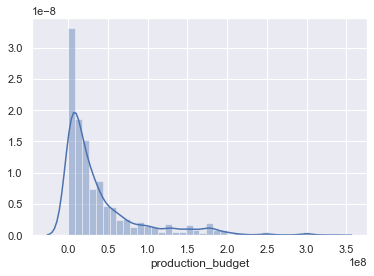

In [157]:
#using a seaborn distribution plot

sns.set(color_codes=True) #seaborn color setting

x = recentpcost #setting x variable

sns.distplot(x);

## Which 5 genres had the highest box office revenue?

In [ ]:
code here: KAT

***Findings***: In the Rotten Tomatoes dataset, Is there a common genre associated with highest box office revenue?

## Data Visualization

In [ ]:
code here

***Findings***: write summary here